### _Importing Libraries_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### _Loading Data and Creating a Copy_

In [2]:
train= pd.read_csv('LoanPredTrain.csv')
test= pd.read_csv('LoanPredTest.csv')

In [3]:
train_original= train.copy()
test_original = test.copy()

### _Observing Features, Target Variables and their Datatype_

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### _Shape of Dataframe_

In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

### _Univariate Analysis_

#### _Target Variable_

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
train['Loan_Status'].value_counts(normalize='true')

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

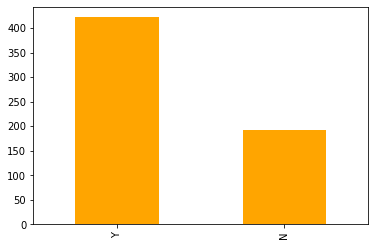

In [11]:
train['Loan_Status'].value_counts().plot.bar(color='orange')

#### _Categorical Features_

<AxesSubplot:title={'center':'Credit History'}>

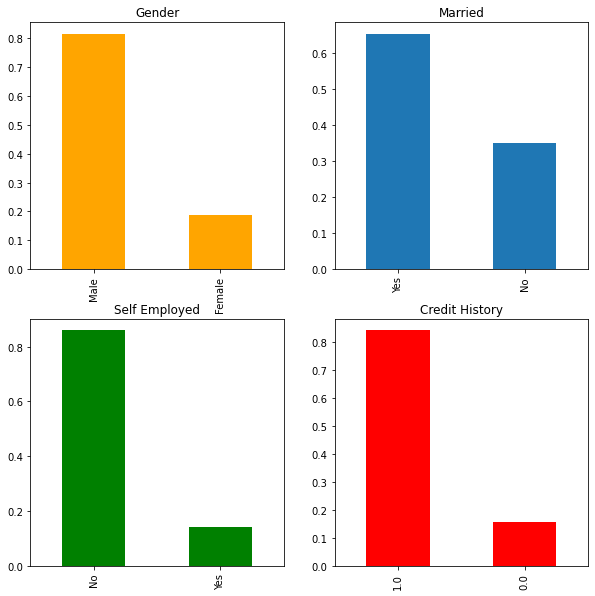

In [12]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize='true').plot.bar(title= 'Gender', figsize= (10,10), color='orange')
plt.subplot(222)
train['Married'].value_counts(normalize='true').plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize='true').plot.bar(title='Self Employed', color='green')
plt.subplot(224)
train['Credit_History'].value_counts(normalize='true').plot.bar(title='Credit History', color='red')

#### _Feature Variables (Ordinal)_

<AxesSubplot:title={'center':'Property Area'}>

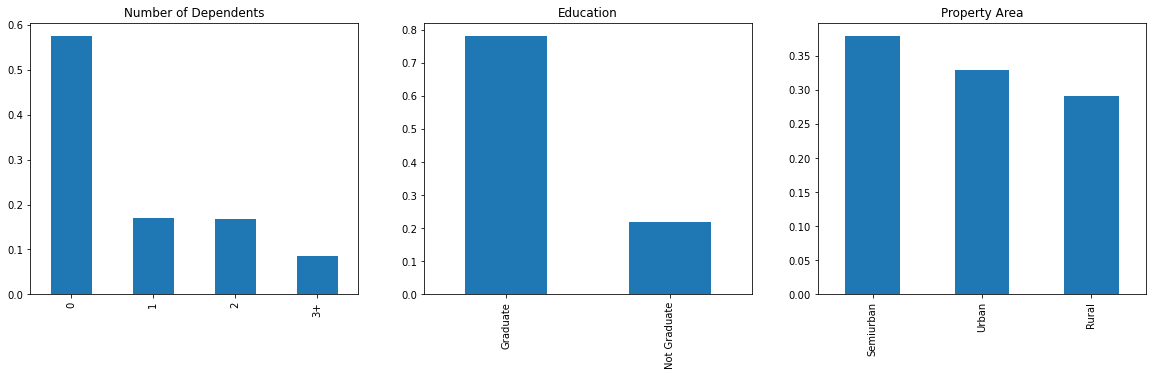

In [13]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize='true').plot.bar(title='Number of Dependents', figsize=(20,5))

plt.subplot(132)
train['Education'].value_counts(normalize='true').plot.bar(title= "Education")

plt.subplot(133)
train["Property_Area"].value_counts(normalize= 'true').plot.bar(title= "Property Area")

#### _Independent Variable (Numerical)_

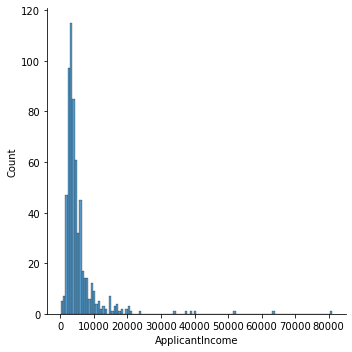

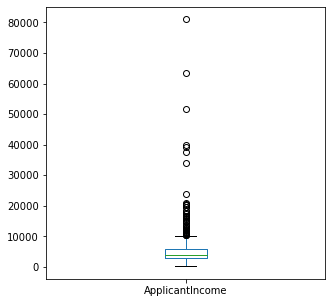

In [14]:
sns.displot(train['ApplicantIncome']);
plt.show()
train['ApplicantIncome'].plot.box(figsize=(5,5))
plt.show()


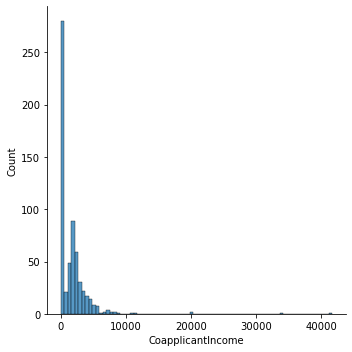

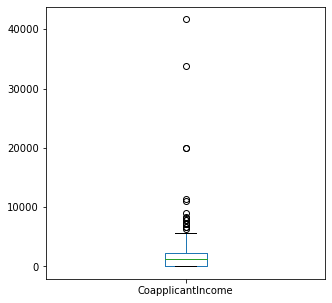

In [15]:
sns.displot(train['CoapplicantIncome']);
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(5,5))
plt.show()

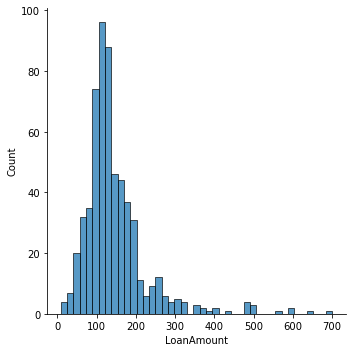

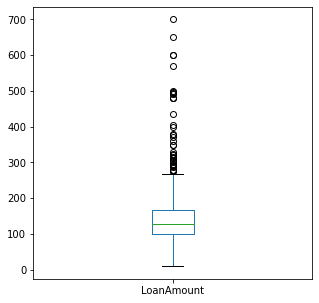

In [16]:
sns.displot(train['LoanAmount']);
plt.show()
train['LoanAmount'].plot.box(figsize=(5,5))
plt.show()

### _Bivariate Analysis_

#### _Categorical Independent Variable vs Target Variable_

In [17]:
Gender=pd.crosstab(train['Gender'], train['Loan_Status'])
print(Gender)

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


<AxesSubplot:xlabel='Gender'>

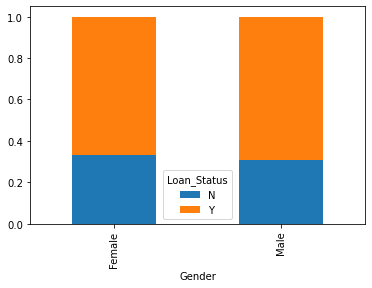

In [18]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='Property_Area'>

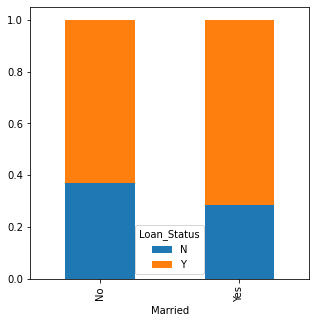

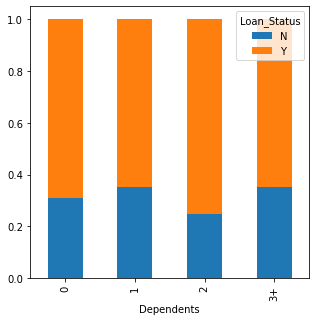

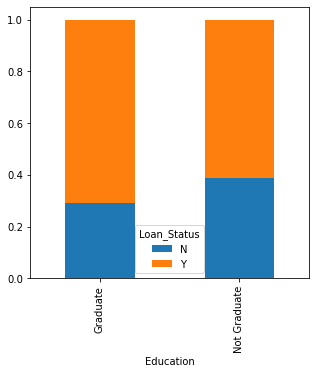

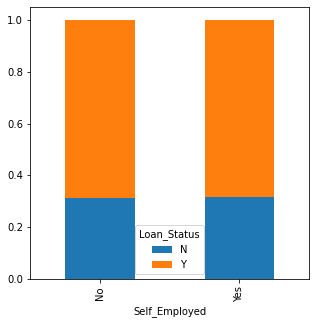

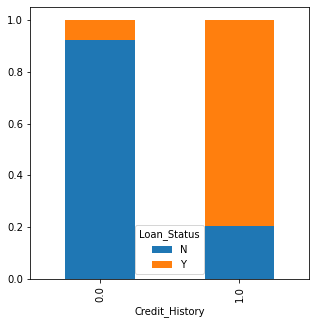

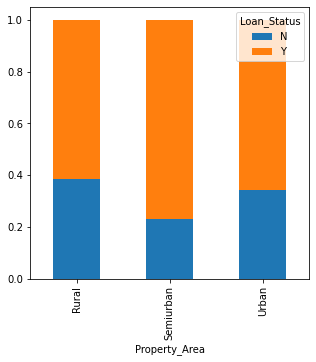

In [19]:
Married= pd.crosstab (train['Married'], train['Loan_Status'])
Dependents= pd.crosstab(train['Dependents'], train['Loan_Status'])
Education= pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed= pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked= True, figsize=(5,5))
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked= True, figsize=(5,5))
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked= True, figsize=(5,5))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked= True, figsize=(5,5))
Credit_History= pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area= pd.crosstab(train['Property_Area'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked= True, figsize=(5,5))
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked= True, figsize=(5,5))
                                                        


### _Numerical Independent Variable vs Target Variable_

#### _Analyzing Applicant Income effect on Loan Status_

<AxesSubplot:xlabel='Loan_Status'>

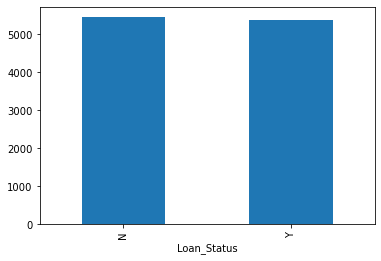

In [20]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [21]:
bins=[0,2500,4000,6000,81000]
group=['Low', 'Average', 'High', 'Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'], bins, labels=group)

In [22]:
Income_bin=pd.crosstab(train['Income_bin'], train['Loan_Status'])
print(Income_bin)

Loan_Status   N    Y
Income_bin          
Low          34   74
Average      67  159
High         45   98
Very High    46   91


Text(0, 0.5, 'Percentage')

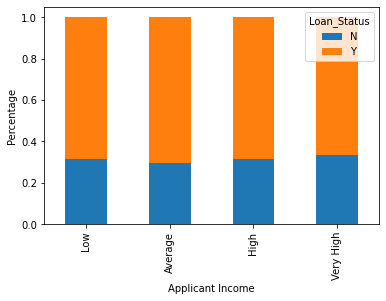

In [23]:
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)
plt.xlabel("Applicant Income")
plt.ylabel("Percentage")

#### _Analyzing Effect of CoApplicant Income on Loan Status_

In [24]:
bins=[0,1000,3000,42000]; group= ['low', 'average',' high']
train['CoApplicant_Income_Bin']= pd.cut(train['CoapplicantIncome'],bins, labels= group)

<AxesSubplot:xlabel='CoApplicant_Income_Bin'>

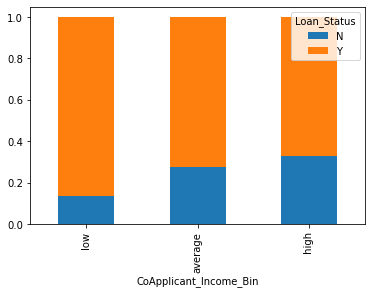

In [25]:
CoApplicant_Income_Bin= pd.crosstab(train['CoApplicant_Income_Bin'], train['Loan_Status'])
CoApplicant_Income_Bin.div(CoApplicant_Income_Bin.sum(1).astype(float),axis=0).plot(kind='bar', stacked= True)

In [26]:
train['Total_Income']=train['ApplicantIncome']+ train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low', 'Average', 'High', 'Very High']
train['Total_Income_Bin']= pd.cut(train['Total_Income'], bins, labels= group)

Text(0, 0.5, 'Percentage')

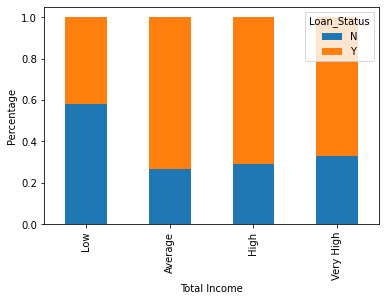

In [27]:
Total_Income_Bin= pd.crosstab(train['Total_Income_Bin'], train['Loan_Status'])
Total_Income_Bin.div(Total_Income_Bin.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.xlabel("Total Income")
plt.ylabel("Percentage")

#### _Analyzing the loan Amount effect on Loan Status_

Text(0, 0.5, 'Percentage')

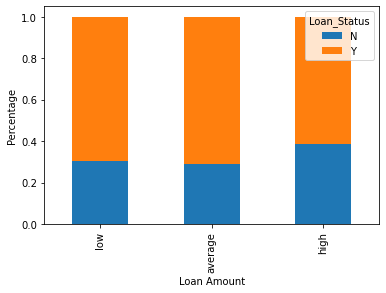

In [28]:
bins=[0,100,200,700]; group=['low', 'average', 'high']
train['LoanAmount_bin']= pd.cut(train['LoanAmount'], bins, labels= group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.xlabel("Loan Amount")
plt.ylabel("Percentage")

### Data Preprocessing

#### _Dropping Bins_

In [29]:
train= train.drop(['Income_bin', 'LoanAmount_bin', 'Total_Income_Bin', 'CoApplicant_Income_Bin', 'Total_Income'], axis=1)

In [30]:
train['Dependents'].replace("3+",3, inplace= True)
test['Dependents'].replace("3+",3,inplace=True)
train['Loan_Status'].replace('N',0, inplace= True)

### _Missing Values and Outlier Treatment_

#### _Missing Values_

In [31]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### _Imputation for Numerical and Categorical Data_

#### _Encoding Gender and Married_

In [32]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')
imputer.fit(train.iloc[:,1:3])
train.iloc[:,1:3]= imputer.transform(train.iloc[:,1:3])

In [33]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### _Dependents_

In [34]:
imp= SimpleImputer(missing_values= np.nan, strategy='median')
x= train.iloc[:,3]
imp.fit(pd.DataFrame(x))
x= imp.transform(pd.DataFrame(x))
train.iloc[:,3]=x

In [35]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### _Self Employed_

In [36]:
imp= SimpleImputer(missing_values= np.nan, strategy='most_frequent')
x= train.iloc[:,5]
imp.fit(pd.DataFrame(x))
x= imp.transform(pd.DataFrame(x))
train.iloc[:,5]=x

In [37]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### _Loan Amount_ & _Loan Amount Term_

In [38]:
impu2= SimpleImputer(missing_values= np.nan, strategy= 'median')
impu2.fit(train.iloc[:,8:10])
train.iloc[:,8:10]= impu2.transform(train.iloc[:,8:10])

In [39]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### _Credit History_

In [40]:
imp3= SimpleImputer(missing_values= np.nan, strategy='most_frequent')
z= train.iloc[:,10]
imp.fit(pd.DataFrame(z))
z= imp.transform(pd.DataFrame(z))
train.iloc[:,10]=x

In [41]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Test Data

In [42]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [43]:
testimp= SimpleImputer(missing_values= np.nan, strategy='most_frequent')
xtest= test.iloc[:,1]
imp.fit(pd.DataFrame(xtest))
xtest= imp.transform(pd.DataFrame(xtest))
test.iloc[:,1]=xtest

In [44]:
imp22= SimpleImputer(missing_values= np.nan, strategy='median')
x= test.iloc[:,3]
imp22.fit(pd.DataFrame(x))
x= imp22.transform(pd.DataFrame(x))
test.iloc[:,3]=x

In [45]:
test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [46]:
testimp3= SimpleImputer(missing_values= np.nan, strategy='most_frequent')
xtest3= test.iloc[:,5]
imp.fit(pd.DataFrame(xtest3))
xtest3= imp.transform(pd.DataFrame(xtest3))
test.iloc[:,5]=xtest3

In [47]:
test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [48]:
testimp4= SimpleImputer(missing_values= np.nan, strategy='median')
xtest4= test.iloc[:,8:10]
imp.fit(pd.DataFrame(xtest4))
xtest4= imp.transform(pd.DataFrame(xtest4))
test.iloc[:,8:10]=xtest4

In [49]:
test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [50]:
testimp5= SimpleImputer(missing_values= np.nan, strategy='most_frequent')
xtest5= test.iloc[:,10]
imp.fit(pd.DataFrame(xtest5))
xtest5= imp.transform(pd.DataFrame(xtest5))
test.iloc[:,10]=xtest5

In [51]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### _Outlier Treatment_

#### _Taking Log Transformation_

<AxesSubplot:>

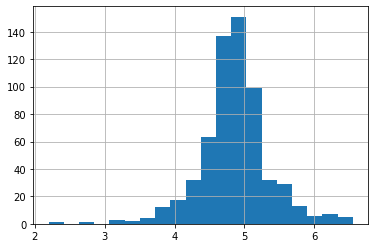

In [52]:
train['LoanAmount_log']= np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

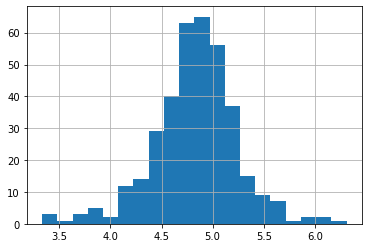

In [53]:
test['LoanAmount_log']= np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

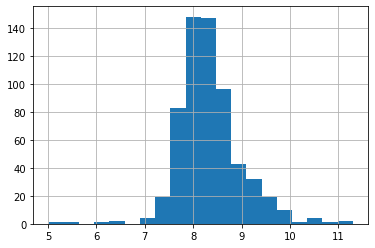

In [54]:
train['ApplicantIncome_log']= np.log(train['ApplicantIncome'])
train['ApplicantIncome_log'].hist(bins=20)

<AxesSubplot:>

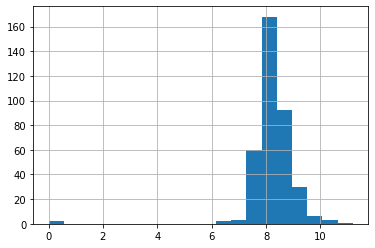

In [55]:
test['ApplicantIncome_log']= np.log(test['ApplicantIncome']+1)
test['ApplicantIncome_log'].hist(bins=20)

<AxesSubplot:>

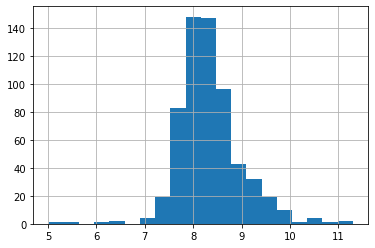

In [56]:
train['CoApplicantIncome_log']= np.log(train['ApplicantIncome']+1)
train['ApplicantIncome_log'].hist(bins=20)

<AxesSubplot:>

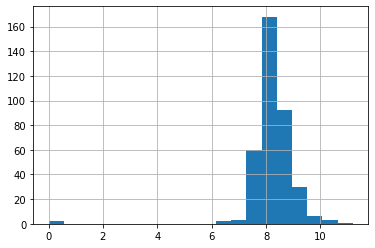

In [57]:
test['CoApplicantIncome_log']= np.log(test['ApplicantIncome']+1)
test['ApplicantIncome_log'].hist(bins=20)

#### _Dropping LoanID_

In [58]:
train= train.drop('Loan_ID', axis=1)
test= test.drop('Loan_ID', axis=1)

### _Preparing Data for Logistic Regression_

In [59]:
train['Loan_Status'].replace(0,'N', inplace=True)

#### _Dropping Redundant Features_

In [60]:
train= train.drop('CoapplicantIncome', axis=1)
train= train.drop('ApplicantIncome', axis=1)
train= train.drop('LoanAmount', axis=1)

In [61]:

train['Credit_History'].replace('No', 0, inplace= True)
train['Credit_History'].replace('Yes', 1, inplace= True)
print(train)

     Gender Married  Dependents     Education Self_Employed  Loan_Amount_Term  \
0      Male      No         0.0      Graduate            No             360.0   
1      Male     Yes         1.0      Graduate            No             360.0   
2      Male     Yes         0.0      Graduate           Yes             360.0   
3      Male     Yes         0.0  Not Graduate            No             360.0   
4      Male      No         0.0      Graduate            No             360.0   
..      ...     ...         ...           ...           ...               ...   
609  Female      No         0.0      Graduate            No             360.0   
610    Male     Yes         3.0      Graduate            No             180.0   
611    Male     Yes         1.0      Graduate            No             360.0   
612    Male     Yes         2.0      Graduate            No             360.0   
613  Female      No         0.0      Graduate           Yes             360.0   

     Credit_History Propert

In [62]:
test= test.drop('CoapplicantIncome', axis=1)
test= test.drop('ApplicantIncome', axis=1)
test= test.drop('LoanAmount', axis=1)

In [63]:
print(test)

    Gender Married  Dependents     Education Self_Employed  Loan_Amount_Term  \
0     Male     Yes         0.0      Graduate            No             360.0   
1     Male     Yes         1.0      Graduate            No             360.0   
2     Male     Yes         2.0      Graduate            No             360.0   
3     Male     Yes         2.0      Graduate            No             360.0   
4     Male      No         0.0  Not Graduate            No             360.0   
..     ...     ...         ...           ...           ...               ...   
362   Male     Yes         3.0  Not Graduate           Yes             360.0   
363   Male     Yes         0.0      Graduate            No             360.0   
364   Male      No         0.0      Graduate            No             360.0   
365   Male     Yes         0.0      Graduate            No             360.0   
366   Male      No         0.0      Graduate           Yes             180.0   

     Credit_History Property_Area  Loan

### _Encoding Categorical Features_

In [64]:
x= train.drop('Loan_Status',1)
y=train.Loan_Status

In [65]:
x= pd.get_dummies(x)
print(x)

     Dependents  Loan_Amount_Term  Credit_History  LoanAmount_log  \
0           0.0             360.0               0        4.852030   
1           1.0             360.0               0        4.852030   
2           0.0             360.0               1        4.189655   
3           0.0             360.0               0        4.787492   
4           0.0             360.0               0        4.948760   
..          ...               ...             ...             ...   
609         0.0             360.0               0        4.262680   
610         3.0             180.0               0        3.688879   
611         1.0             360.0               0        5.533389   
612         2.0             360.0               0        5.231109   
613         0.0             360.0               1        4.890349   

     ApplicantIncome_log  CoApplicantIncome_log  Gender_Female  Gender_Male  \
0               8.674026               8.674197              0            1   
1            

In [66]:
test=pd.get_dummies(test)

In [67]:
print(test)

     Dependents  Loan_Amount_Term  Credit_History  LoanAmount_log  \
0           0.0             360.0             1.0        4.700480   
1           1.0             360.0             1.0        4.836282   
2           2.0             360.0             1.0        5.337538   
3           2.0             360.0             1.0        4.605170   
4           0.0             360.0             1.0        4.356709   
..          ...               ...             ...             ...   
362         3.0             360.0             1.0        4.727388   
363         0.0             360.0             1.0        4.744932   
364         0.0             360.0             1.0        4.836282   
365         0.0             360.0             1.0        5.062595   
366         0.0             180.0             1.0        4.584967   

     ApplicantIncome_log  CoApplicantIncome_log  Gender_Female  Gender_Male  \
0               8.651899               8.651899              0            1   
1            

#### _Splitting Training Data for Cross Validation_

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_CV, Y_train, Y_CV= train_test_split(x,y, test_size=0.2, random_state=0)

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [70]:
from sklearn.metrics import accuracy_score
pred_cv= model.predict(X_CV)

In [71]:
accuracy_score(Y_CV, pred_cv)

0.7154471544715447

In [72]:
pred_test= model.predict(test)

In [73]:
submission= pd.read_csv('sample_submission_49d68Cx.csv')

In [74]:
submission['Loan_Status']= pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [75]:
print(submission.to_string())

      Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           Y
4    LP001051           Y
5    LP001054           Y
6    LP001055           Y
7    LP001056           Y
8    LP001059           Y
9    LP001067           Y
10   LP001078           Y
11   LP001082           Y
12   LP001083           Y
13   LP001094           Y
14   LP001096           Y
15   LP001099           Y
16   LP001105           Y
17   LP001107           Y
18   LP001108           Y
19   LP001115           Y
20   LP001121           Y
21   LP001124           Y
22   LP001128           Y
23   LP001135           Y
24   LP001149           Y
25   LP001153           N
26   LP001163           Y
27   LP001169           Y
28   LP001174           Y
29   LP001176           Y
30   LP001177           Y
31   LP001183           Y
32   LP001185           Y
33   LP001187           Y
34   LP001190           Y
35   LP001203           Y
36   LP001208           Y
37   LP00121

In [76]:
pd.DataFrame(submission, columns= ['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')